In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
! git clone https://github.com/acoadmarmon/resnet18-tensorflow.git

Cloning into 'resnet18-tensorflow'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [ ]:
latent_cars = np.load('/content/drive/MyDrive/latents_cars.npy')
images = np.load('/content/drive/MyDrive/generated_images_cars.npy')

In [ ]:
images = np.transpose(images, [0,2,3,1])

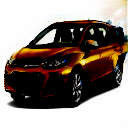

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(images[987]*255)

In [ ]:
! mv "/content/resnet18-tensorflow/resnet_18.py" "/content/resnet_18.py"

In [ ]:
from resnet_18 import ResNet18
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
inp = tf.keras.layers.Input(shape=(128,128,3))
preprocess = preprocess_input(inp)
res = ResNet18(include_top=False, weights='imagenet', input_shape=(128,128,3))(preprocess)
flat = tf.keras.layers.Flatten()(res)
fc1  = tf.keras.layers.Dense(2048)(flat)
fc2 = tf.keras.layers.Dense(512)(fc1)
out = tf.keras.layers.Dense(128)(fc2)

In [ ]:
model = tf.keras.Model(inputs=preprocess, outputs=out)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, latent_cars, test_size=0.2)

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [ ]:
train_ds = train_ds.batch(64).cache().prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(64).cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
model.compile(optimizer='adam', loss="logcosh")

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=7)

Epoch 1/7
104/104 [==============================] - 662s 6s/step - loss: 1.5821 - val_loss: 25.9243
Epoch 2/7
104/104 [==============================] - 661s 6s/step - loss: 0.3932 - val_loss: 0.5260
Epoch 3/7
104/104 [==============================] - 661s 6s/step - loss: 0.3798 - val_loss: 0.3871
Epoch 4/7
104/104 [==============================] - 666s 6s/step - loss: 0.3736 - val_loss: 0.3874
Epoch 5/7
104/104 [==============================] - 669s 6s/step - loss: 0.3692 - val_loss: 0.3795
Epoch 6/7
104/104 [==============================] - 671s 6s/step - loss: 0.3653 - val_loss: 0.3733
Epoch 7/7
104/104 [==============================] - 676s 7s/step - loss: 0.3619 - val_loss: 0.3729


In [ ]:
model.save("/content/drive/MyDrive/saved_net/")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved_net/assets


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/saved_net")

In [ ]:
tf.reduce_mean(tf.losses.mean_squared_error(model.predict(images[:1000]), latent_cars[:1000]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.9703874>

In [ ]:
! unzip "/content/lat images.zip" -d "/content/"
! unzip "/content/old.zip" -d "/content/"

Archive:  /content/lat images.zip
   creating: /content/lat images/
  inflating: /content/lat images/462.jpg  
  inflating: /content/lat images/07.jpg  
  inflating: /content/lat images/684.jpg  
  inflating: /content/lat images/02.jpg  
  inflating: /content/lat images/75.jpg  
  inflating: /content/lat images/12.jpg  
  inflating: /content/lat images/1325.jpg  
  inflating: /content/lat images/798.jpg  
  inflating: /content/lat images/764.jpg  
  inflating: /content/lat images/2886.jpg  
  inflating: /content/lat images/1008.jpg  
  inflating: /content/lat images/841.jpg  
  inflating: /content/lat images/997.jpg  
  inflating: /content/lat images/1493.jpg  
  inflating: /content/lat images/2925.jpg  
Archive:  /content/old.zip
   creating: /content/old/
  inflating: /content/old/3.jpg      
  inflating: /content/old/5.jpg      
  inflating: /content/old/.jpg       
  inflating: /content/old/6.jpg      
  inflating: /content/old/2.jpg      
  inflating: /content/old/1.jpg      
  in

In [ ]:
import os
import cv2
lat_arr = {}
old_arr = {}
for img_name in os.listdir("/content/lat images"):
  img_path = os.path.join("/content/lat images/", img_name)
  img = cv2.imread(img_path)
  img = cv2.resize(img, (128,128))
  img = np.array(img).astype('float')/255
  l = model.predict(np.expand_dims(img,0))[0]
  lat_arr[img_name.split('.')[0]] = l

for img_name in os.listdir("/content/old"):
  img_path = os.path.join("/content/old/", img_name)
  img = cv2.imread(img_path)
  img = cv2.resize(img, (128,128))
  img = np.array(img).astype('float')/255
  l = model.predict(np.expand_dims(img,0))[0]
  old_arr[img_name.split('.')[0]] = l

In [ ]:
w_arr = []
for i in lat_arr.keys():
  for j in old_arr.keys():
    l1 = lat_arr[i]
    l2 = old_arr[j]
    w = (l1+l2)/2
    w_arr.append(w)

In [ ]:
np.array(w_arr).shape

(105, 128)

In [ ]:
np.save('lat1.npy',w_arr)